## Observations and Insights

## Dependencies and starter code

In [3]:
%matplotlib notebook

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [5]:
# Combine the data into a single dataset
merge_data = mouse_metadata.merge(study_results,on = "Mouse ID",how = "outer")
merge_data.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
group_data = merge_data.groupby("Drug Regimen")
data_mean = round(group_data["Tumor Volume (mm3)"].mean(),2)
data_median = round(group_data["Tumor Volume (mm3)"].median(),2)
data_var = round(group_data["Tumor Volume (mm3)"].var(),2)
data_std = round(group_data["Tumor Volume (mm3)"].std(),2)
data_sem = round(group_data["Tumor Volume (mm3)"].sem(),2)

In [13]:
new_table = pd.concat([data_mean, data_median,data_var,data_std,data_sem], axis=1).reset_index()

In [17]:
new_table.columns=["Drug Regimen","Mean","Median","Var","Std","Sem"]
new_table.sort_values(by=["Sem","Var","Std"])

,Drug Regimen,Mean,Median,Var,Std,Sem
7,Ramicane,40.22,40.67,23.49,4.85,0.32
0,Capomulin,40.68,41.56,24.95,4.99,0.33
1,Ceftamin,52.59,51.78,39.29,6.27,0.47
2,Infubinol,52.88,51.82,43.13,6.57,0.49
6,Propriva,52.32,50.85,42.35,6.51,0.51
9,Zoniferol,53.24,51.82,48.53,6.97,0.52
8,Stelasyn,54.23,52.43,59.45,7.71,0.57
5,Placebo,54.03,52.29,61.17,7.82,0.58
4,Naftisol,54.33,52.51,66.17,8.13,0.60
3,Ketapril,55.24,53.70,68.55,8.28,0.60


## Bar plots

<IPython.core.display.Javascript object>


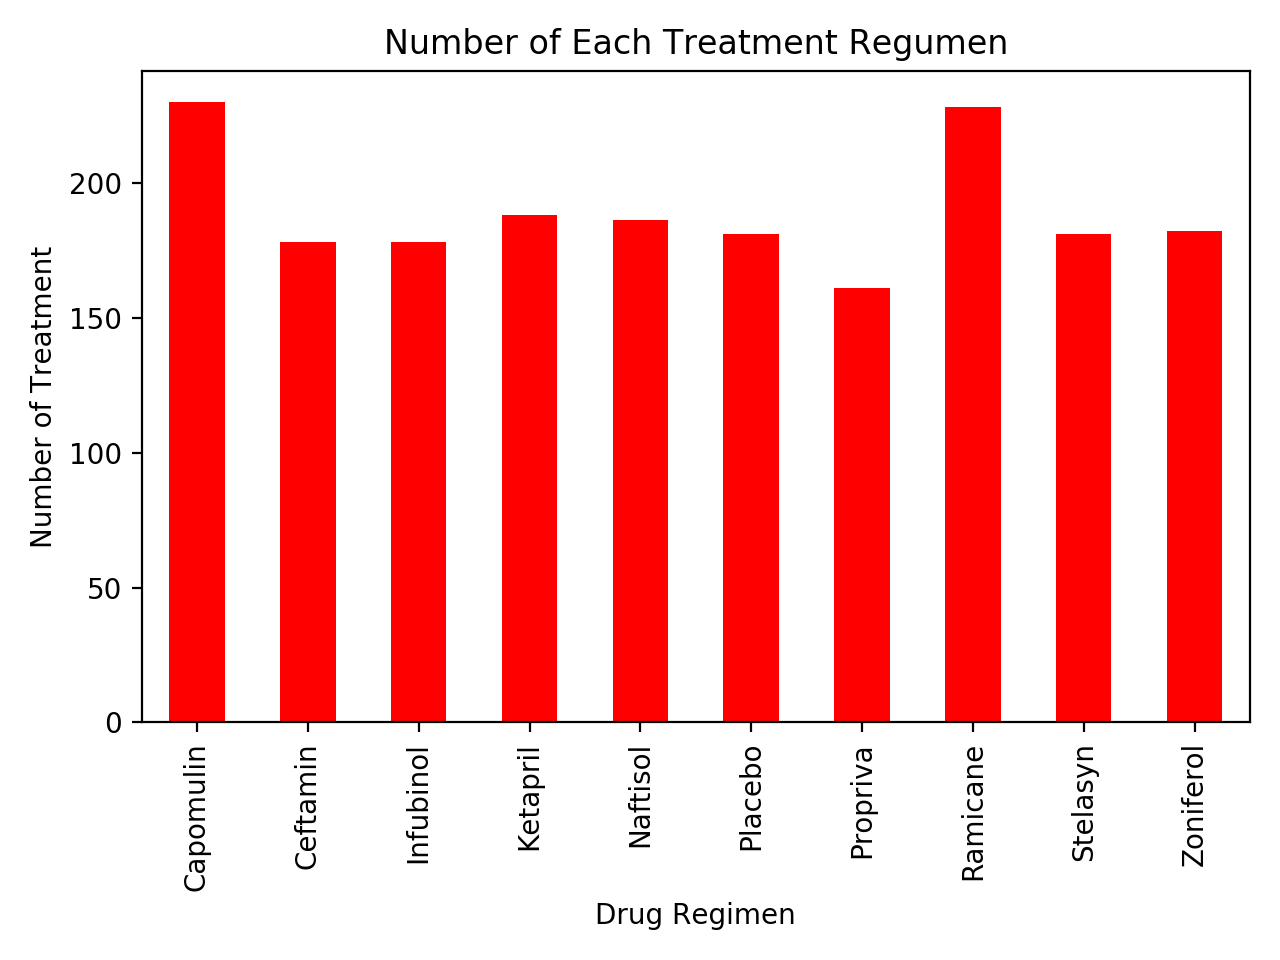

In [36]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_num = group_data["Mouse ID"].count()
pd_chart = regimen_num.plot(kind="bar",title="Number of Each Treatment Regumen",color="r")
pd_chart.set_xlabel("Drug Regimen")
pd_chart.set_ylabel("Number of Treatment")

plt.show()
plt.tight_layout()

In [37]:
plt.close()

<IPython.core.display.Javascript object>


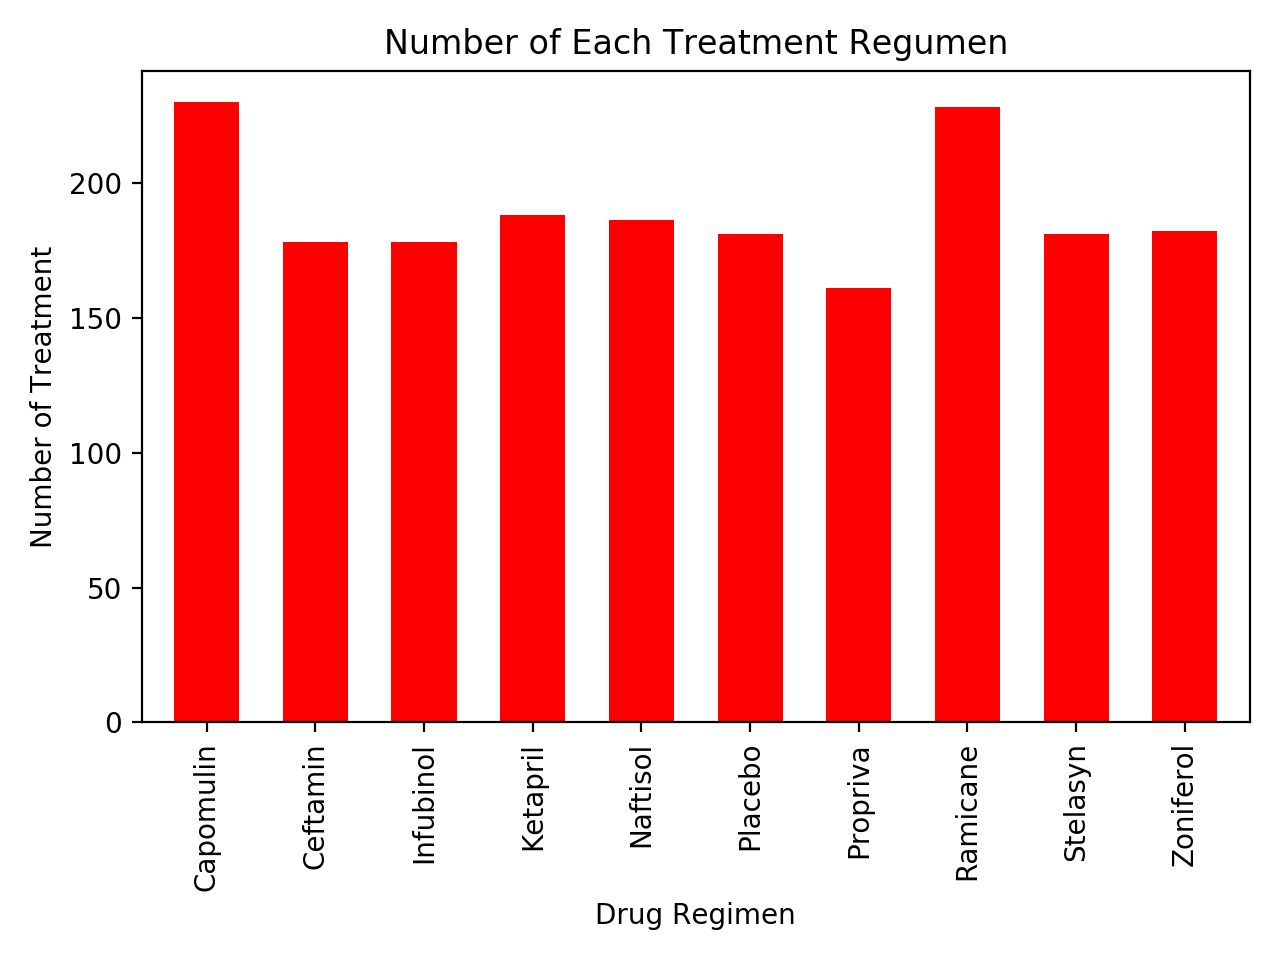

In [18]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
py_regimen = group_data["Tumor Volume (mm3)"]
py_x_axis = np.arange(len(py_regimen))
py_y_axis = group_data["Mouse ID"].count()
plt.bar(py_x_axis, py_y_axis,width=0.6,alpha=1, align="center",color="red")
plt.title("Number of Each Treatment Regumen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Treatment")
tick_locations = [value for value in py_x_axis]
plt.xticks(tick_locations, new_table["Drug Regimen"], rotation="vertical")
plt.xlim(-0.6, len(py_x_axis)-0.4)
plt.tight_layout()

In [39]:
plt.close()

## Pie plots

<IPython.core.display.Javascript object>


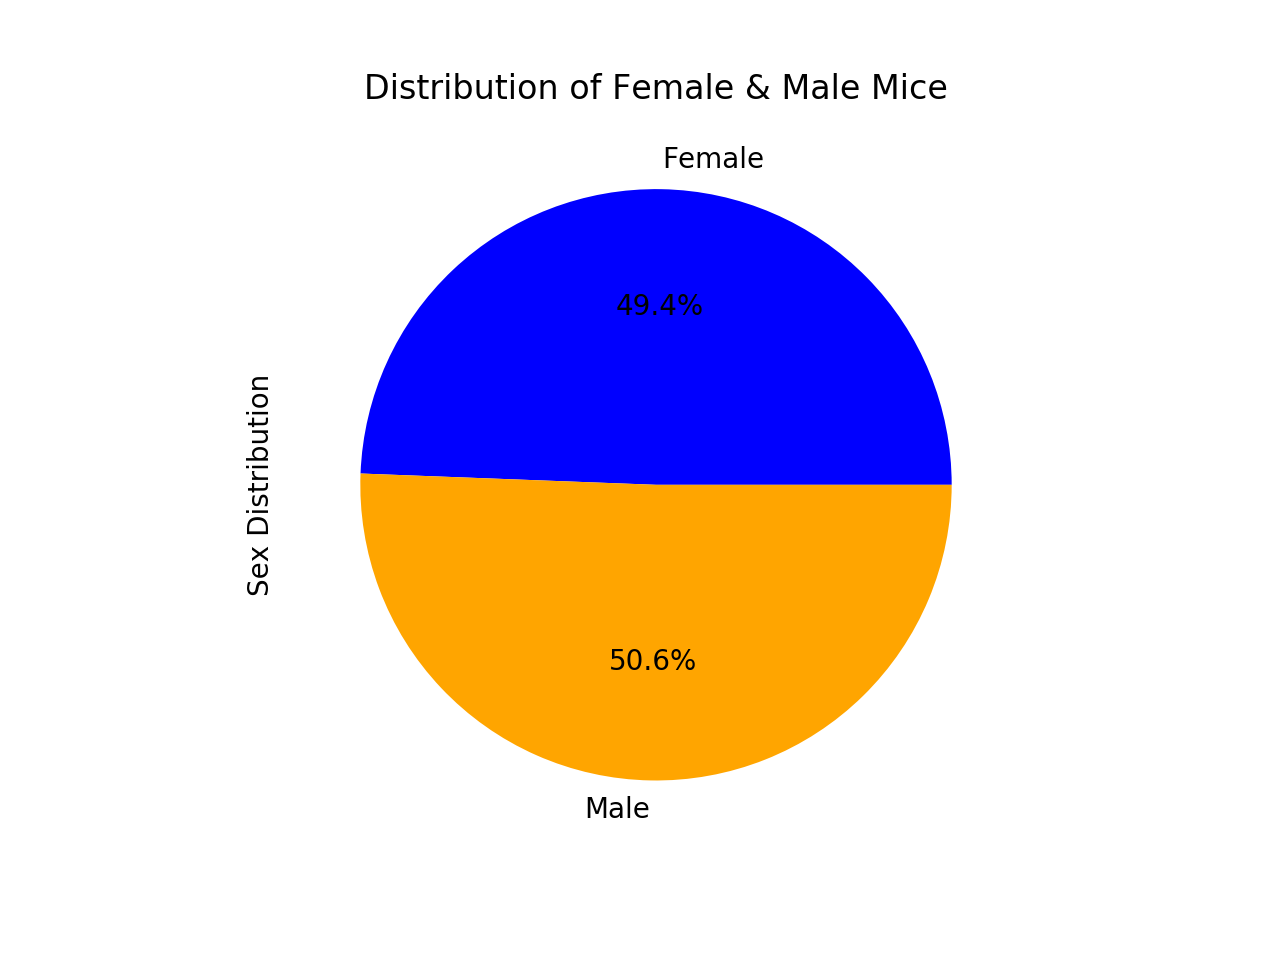

Text(0, 0.5, 'Sex Distribution')

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group = merge_data.groupby("Sex")
sex_data = sex_group["Mouse ID"].count()
y_axis_name = sex_data.keys()
colors = ["blue","Orange"]
pd_sex_pie = sex_data.plot(kind="pie", title=("Distribution of Female & Male Mice"),autopct="%1.1f%%",colors=colors)
pd_sex_pie.set_ylabel("Sex Distribution")

In [41]:
plt.close()

<IPython.core.display.Javascript object>


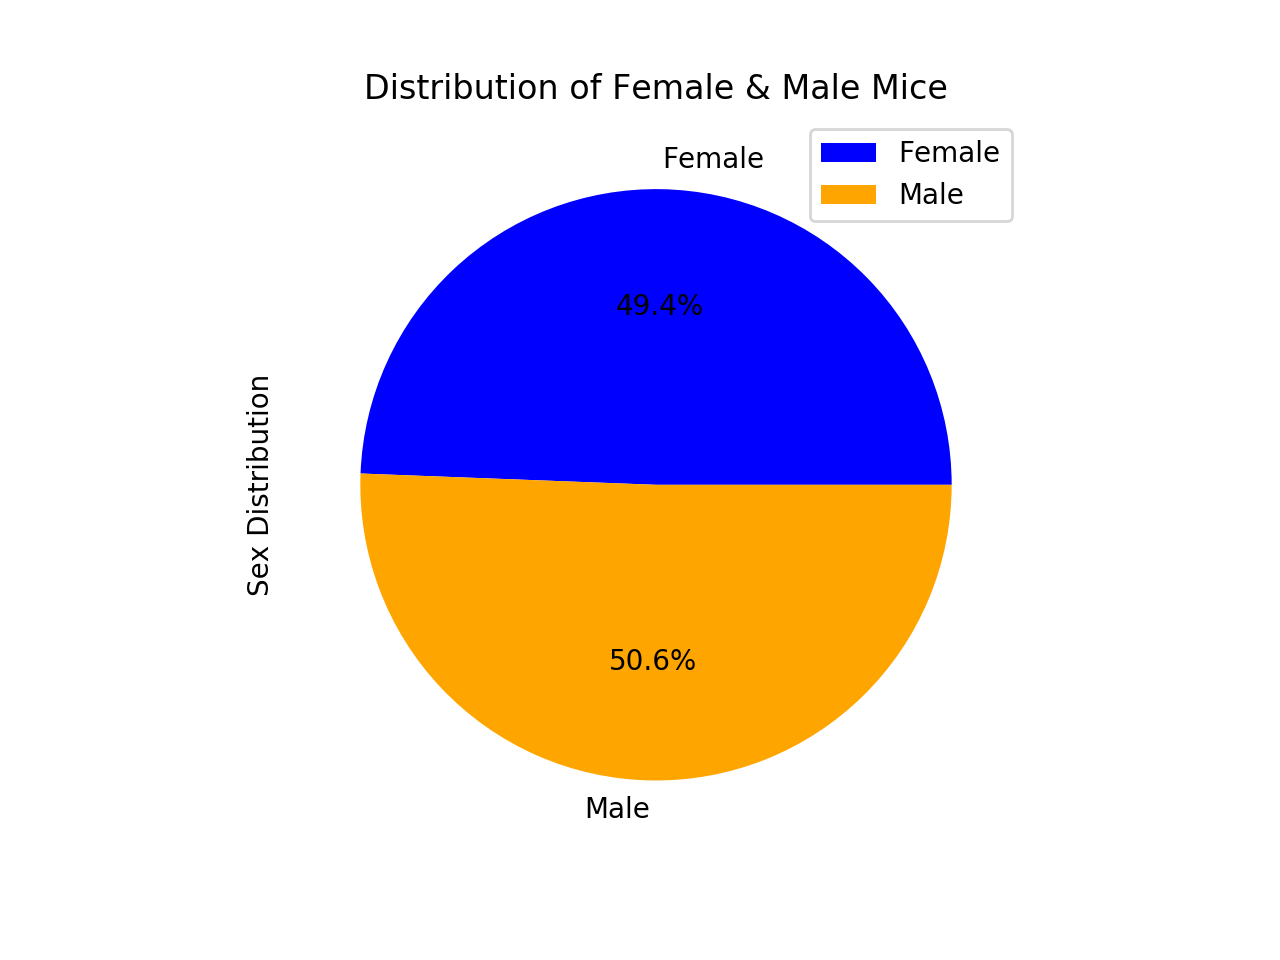

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_labels = ["Female","Male"]
colors = ["blue","Orange"]
explode= (0,0)
plt.pie(sex_data, explode=explode, labels=sex_labels, colors=colors,
        autopct="%1.1f%%")
plt.title("Distribution of Female & Male Mice")
plt.ylabel("Sex Distribution")
plt.legend(labels=["Female","Male"],loc="best")

In [43]:
plt.close()

## Quartiles, outliers and boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
regimen_data = merge_data.set_index("Drug Regimen")
four_regimens = regimen_data.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]
four_regimens_sum = four_regimens.groupby("Mouse ID").sum()["Tumor Volume (mm3)"]
four_regimens_sum 

Mouse ID
a203    563.127077
a251    552.370946
a275    527.709651
a411    407.013854
a444    430.600524
           ...    
y769    562.908873
y793    385.068292
y865    549.985586
z578    384.115100
z581    539.795837
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [54]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = four_regimens_sum.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
IQR = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {IQR}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 340.0010610275
The upper quartile of tumor volume is: 449.98455965499994
The interquartile range of tumor volume is: 109.98349862749996
The the median of tumor volume is: 394.845840265 
Values below 175.02581308625005 could be outliers.
Values above 614.9598075962499 could be outliers.


<IPython.core.display.Javascript object>


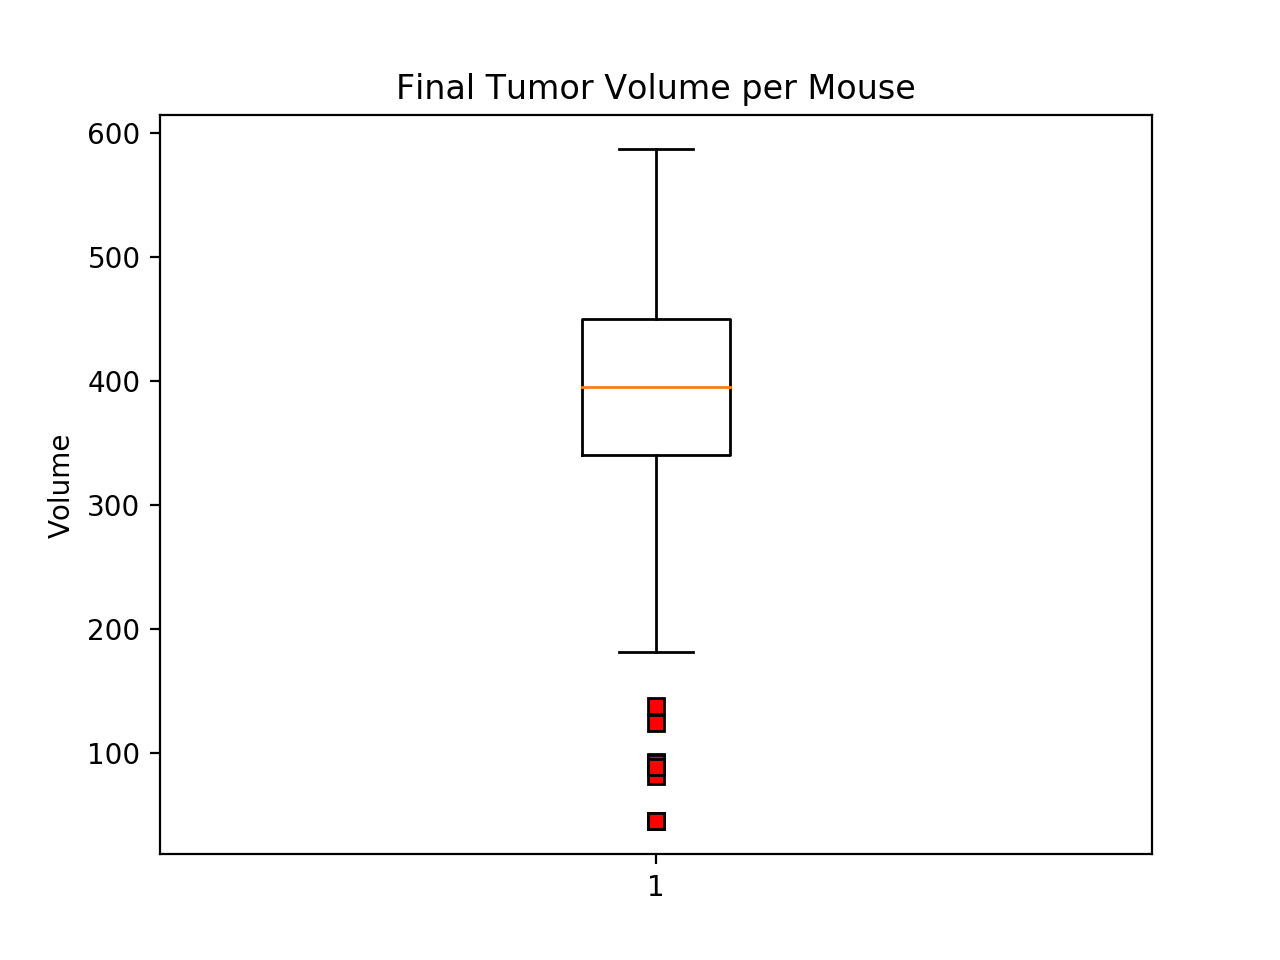

In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_square = dict(markerfacecolor='r', marker='s')
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume per Mouse')
ax1.set_ylabel('Volume')
ax1.boxplot(four_regimens_sum,flierprops=red_square)
plt.show()

In [47]:
plt.close()

## Line and scatter plots

<IPython.core.display.Javascript object>


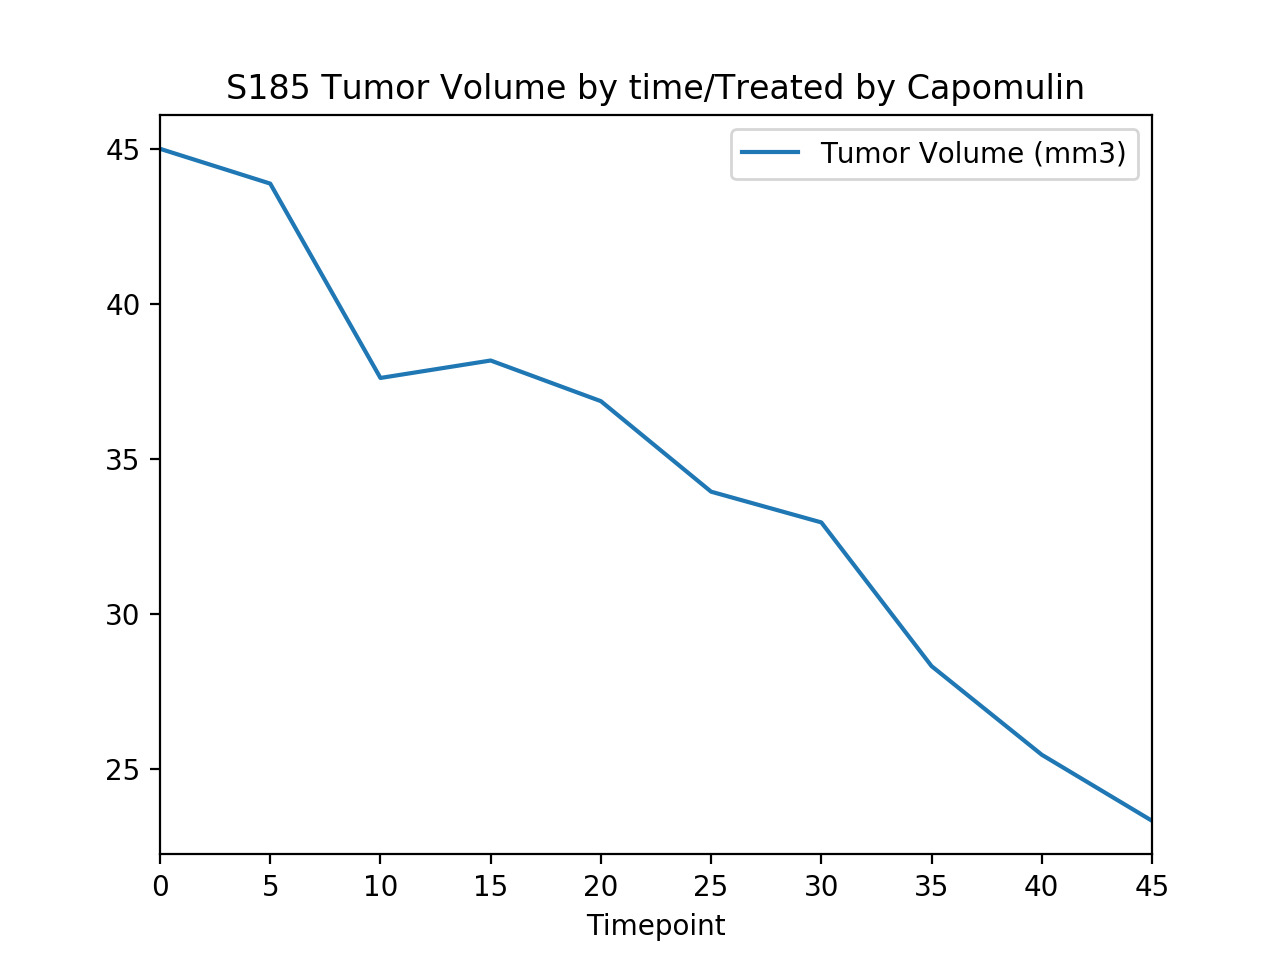

In [49]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = four_regimens.loc[["Capomulin"]]
s185_data = capomulin_data[capomulin_data["Mouse ID"]=="s185"]
s185_data.plot.line("Timepoint", "Tumor Volume (mm3)",title="S185 Tumor Volume by time/Treated by Capomulin")

In [50]:
plt.close()

<IPython.core.display.Javascript object>


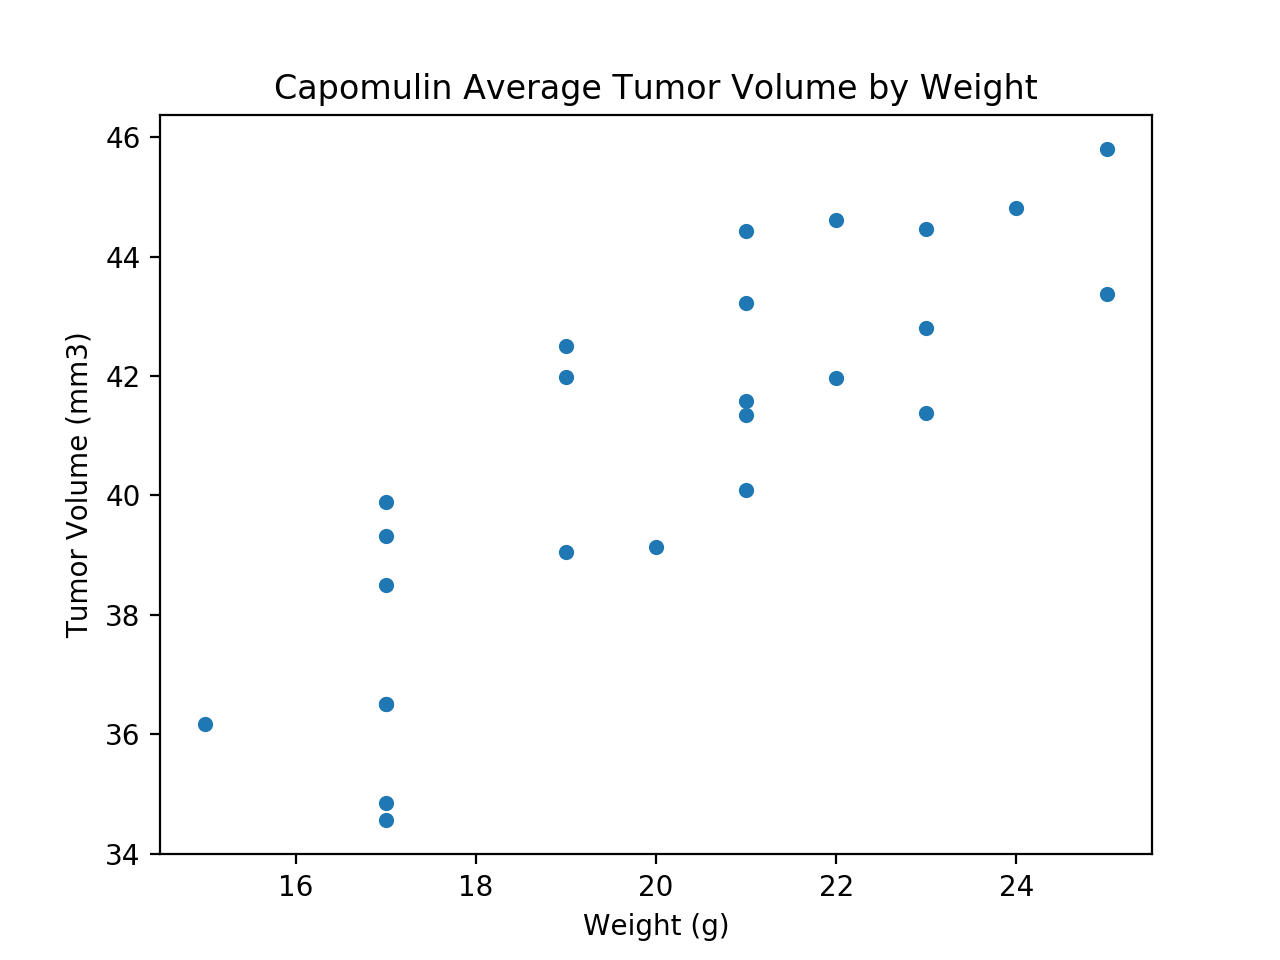

In [51]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_data = capomulin_data.groupby("Mouse ID").mean()
weight_data.plot.scatter("Weight (g)","Tumor Volume (mm3)",title="Capomulin Average Tumor Volume by Weight")

In [52]:
plt.close()

<IPython.core.display.Javascript object>


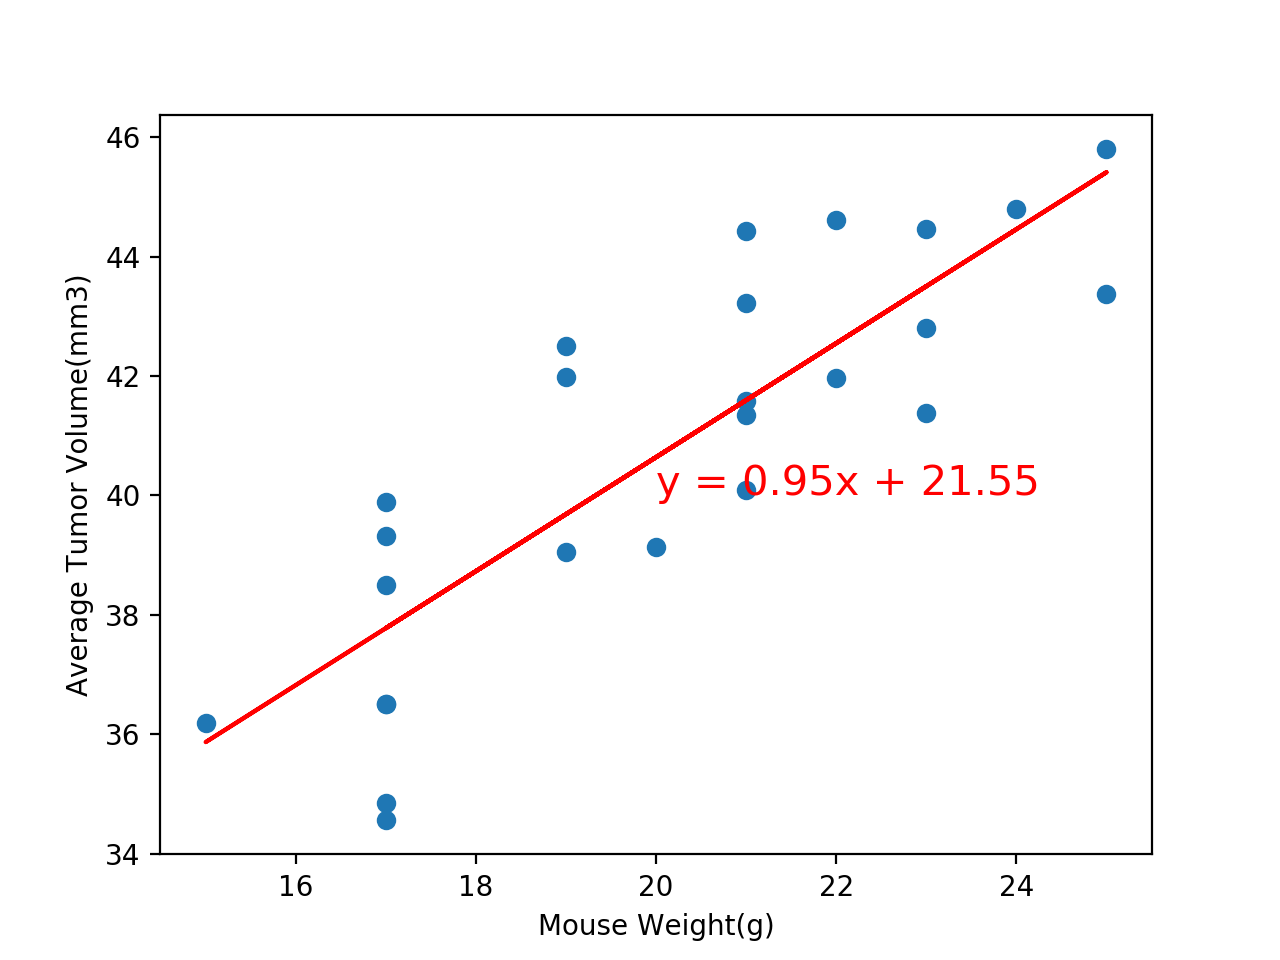

The r-squared is: 0.8419363424694718


In [53]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = weight_data["Weight (g)"]
y_values = weight_data["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Mouse Weight(g)')
plt.ylabel('Average Tumor Volume(mm3)')
print(f"The r-squared is: {rvalue}")
plt.show()

## Observations 

##### 1. There is a strong positive correlation between Mouse Weight and Average Tumor Volume. The heavier the mouse is, more tumor volume it tend to carry. 
##### 2. There are outliers within the most promising treatment regimens data. For more accurate analysis, we have to get rid of data with Tumor Volume lower than 175 and higher than 614. 
##### 3. Take mouse s185 as a sample, after treating by Capmulin, its total Tumor Volume is getting lower with time goes by.